In [10]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-fuzzy in c:\users\larac\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.5.0)




[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\larac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\larac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client()
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-4, 4, 0.1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-1, 1, 0.01), 'varerrotemp')
aquecedor =ctrl.Consequent(np.arange(0, 100, 1), 'aquecedor')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-4, -4, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 4, 4])
# You can see how these look with .view()
errotemp.view()

C:\Users\larac\AppData\Local\Temp\ipykernel_25608\3140593766.py:8: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()

KeyboardInterrupt


KeyboardInterrupt



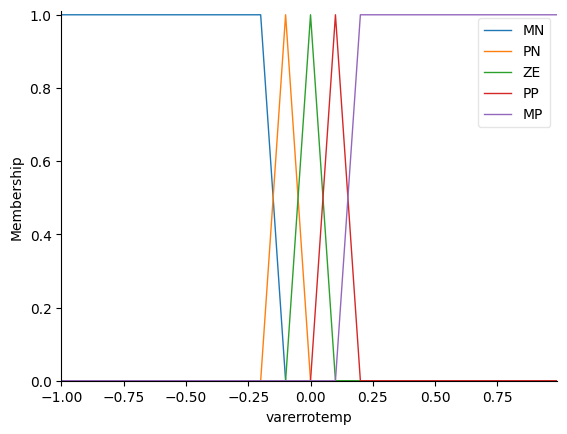

In [ ]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-1, -1, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 1, 1])
# You can see how these look with .view()
varerrotemp.view()

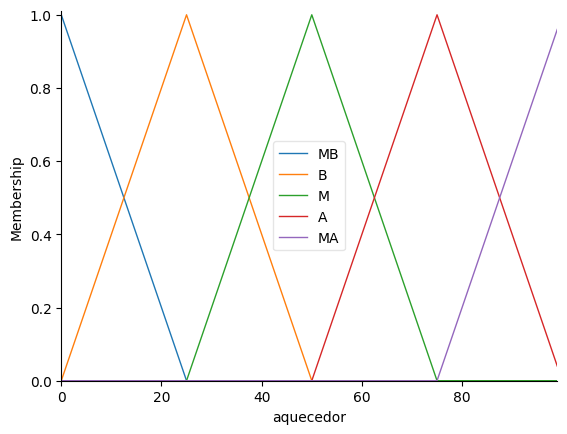

In [13]:
aquecedor['MB'] = fuzz.trimf(aquecedor.universe, [0, 0, 25])
aquecedor['B'] = fuzz.trimf(aquecedor.universe, [0, 25, 50])
aquecedor['M'] = fuzz.trimf(aquecedor.universe, [25, 50, 75])
aquecedor['A'] = fuzz.trimf(aquecedor.universe, [50, 75, 100])
aquecedor['MA'] = fuzz.trimf(aquecedor.universe, [75, 100, 100])
aquecedor.view()

In [14]:
regra1 = ctrl.Rule(errotemp['MN'] & varerrotemp['MN'], aquecedor['MB'])
regra2 = ctrl.Rule(errotemp['PN'] & varerrotemp['MN'], aquecedor['B'])
regra3 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MN'], aquecedor['M'])
regra4 = ctrl.Rule(errotemp['PP'] & varerrotemp['MN'], aquecedor['A'])
regra5 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], aquecedor['MA'])
regra6 = ctrl.Rule(errotemp['MN'] & varerrotemp['PN'], aquecedor['MB'])
regra7 = ctrl.Rule(errotemp['PN'] & varerrotemp['PN'], aquecedor['B'])
regra8 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PN'], aquecedor['M'])
regra9 = ctrl.Rule(errotemp['PP'] & varerrotemp['PN'], aquecedor['A'])
regra10 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], aquecedor['MA'])
regra11 = ctrl.Rule(errotemp['MN'] & varerrotemp['ZE'], aquecedor['B'])
regra12 = ctrl.Rule(errotemp['PN'] & varerrotemp['ZE'], aquecedor['M'])
regra13 = ctrl.Rule(errotemp['ZE'] & varerrotemp['ZE'], aquecedor['M'])
regra14 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], aquecedor['A'])
regra15 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], aquecedor['MA'])
regra16 = ctrl.Rule(errotemp['MN'] & varerrotemp['PP'], aquecedor['M'])
regra17 = ctrl.Rule(errotemp['PN'] & varerrotemp['PP'], aquecedor['A'])
regra18 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PP'], aquecedor['A'])
regra19 = ctrl.Rule(errotemp['PP'] & varerrotemp['PP'], aquecedor['MA'])
regra20 = ctrl.Rule(errotemp['MP'] & varerrotemp['PP'], aquecedor['MA'])
regra21 = ctrl.Rule(errotemp['MN'] & varerrotemp['MP'], aquecedor['A'])
regra22 = ctrl.Rule(errotemp['PN'] & varerrotemp['MP'], aquecedor['A'])
regra23 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MP'], aquecedor['MA'])
regra24 = ctrl.Rule(errotemp['PP'] & varerrotemp['MP'], aquecedor['MA'])
regra25 = ctrl.Rule(errotemp['MP'] & varerrotemp['MP'], aquecedor['MA'])

In [15]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25])

potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [21]:
# --- Base de Regras Corrigida para Suavidade (Damping) ---

# Linha 1: Erro Muito Negativo (MN) -> Temperatura muito baixa (Menos Refrigeração)
regra1 = ctrl.Rule(errotemp['MN'] & varerrotemp['MN'], aquecedor['MB'])
regra2 = ctrl.Rule(errotemp['MN'] & varerrotemp['PN'], aquecedor['MB'])
regra3 = ctrl.Rule(errotemp['MN'] & varerrotemp['ZE'], aquecedor['MB'])
regra4 = ctrl.Rule(errotemp['MN'] & varerrotemp['PP'], aquecedor['MB']) # Mais suave que B
regra5 = ctrl.Rule(errotemp['MN'] & varerrotemp['MP'], aquecedor['B']) # Mais suave que M

# Linha 2: Erro Pouco Negativo (PN) -> Temperatura abaixo do setpoint
regra6 = ctrl.Rule(errotemp['PN'] & varerrotemp['MN'], aquecedor['MB'])
regra7 = ctrl.Rule(errotemp['PN'] & varerrotemp['PN'], aquecedor['B'])
regra8 = ctrl.Rule(errotemp['PN'] & varerrotemp['ZE'], aquecedor['B'])
regra9 = ctrl.Rule(errotemp['PN'] & varerrotemp['PP'], aquecedor['M'])
regra10 = ctrl.Rule(errotemp['PN'] & varerrotemp['MP'], aquecedor['A'])

# Linha 3: Erro Zero (ZE) -> Temperatura próxima ao setpoint (Mais Amortecimento)
regra11 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MN'], aquecedor['MB']) # Mais suave que B
regra12 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PN'], aquecedor['B']) # Mais suave que M
regra13 = ctrl.Rule(errotemp['ZE'] & varerrotemp['ZE'], aquecedor['M']) # Equilíbrio (50%)
regra14 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PP'], aquecedor['M']) # Mais suave que A
regra15 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MP'], aquecedor['A'])

# Linha 4: Erro Pouco Positivo (PP) -> Temperatura acima do setpoint
regra16 = ctrl.Rule(errotemp['PP'] & varerrotemp['MN'], aquecedor['M'])
regra17 = ctrl.Rule(errotemp['PP'] & varerrotemp['PN'], aquecedor['A'])
regra18 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], aquecedor['A'])
regra19 = ctrl.Rule(errotemp['PP'] & varerrotemp['PP'], aquecedor['MA'])
regra20 = ctrl.Rule(errotemp['PP'] & varerrotemp['MP'], aquecedor['MA'])

# Linha 5: Erro Muito Positivo (MP) -> Temperatura muito alta
regra21 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], aquecedor['A'])
regra22 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], aquecedor['MA'])
regra23 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], aquecedor['MA'])
regra24 = ctrl.Rule(errotemp['MP'] & varerrotemp['PP'], aquecedor['MA'])
regra25 = ctrl.Rule(errotemp['MP'] & varerrotemp['MP'], aquecedor['MA'])

aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [22]:
# --- Variáveis para o modelo físico completo (Assumindo condições de validação) ---
k_inertia = 0.9
k_crac = 0.08
k_heating = 6.0  # Constante calculada (0.05*40 + 0.02*25 + 3.5)

# --- Loop de Controle Principal ---

sp = 22
tempatual = 18
print(tempatual)
erroatual = tempatual - sp # Inicializa o erro para o primeiro passo

while True:
    erroanterior = erroatual
    erroatual = tempatual - sp
    varerroTemp = erroatual - erroanterior
    
    # 1. FUZZIFICAÇÃO e INFERÊNCIA
    potencia.input['errotemp'] = erroatual
    potencia.input['varerrotemp'] = varerroTemp
    potencia.compute()
    
    P_CRAC_output = potencia.output['aquecedor']
    
    # 2. MODELO FÍSICO CORRIGIDO (Um passo por minuto)
    # T[n+1] = 0.9 * T[n] - 0.08 * P_CRAC + K_heating
    tempatual = (k_inertia * tempatual) - (k_crac * P_CRAC_output) + k_heating
    
    # 3. PUBLICAÇÃO
    print(tempatual)
    client.publish("Aquecedor/Temperatura", tempatual)
    client.publish("Aquecedor/erro", erroatual)
    
    time.sleep(1) # Aguarda 1 segundo ou um tempo para simular o passo de 1 minuto

18
21.53333333333333
19.3819929473325
19.3819929473325
22.777126985932583
22.777126985932583
19.919866887117912
19.919866887117912
23.261213531739454
23.261213531739454
19.682710908687675
19.682710908687675
23.04777315115224
23.04777315115224
19.463037458655403
19.463037458655403
22.850067046123197
22.850067046123197
19.818988006594697
19.818988006594697


KeyboardInterrupt: 

In [ ]:
sp=22
tempatual=18
print(tempatual)
erroatual=4
while True:
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9954 + potencia.output['aquecedor'] * 0.001963
    time.sleep(0.1)
    i += 1
  print(tempatual)
  client.publish("Aquecedor/Temperatura", tempatual)
  client.publish("Aquecedor/erro", erroatual)

18
17.669646126047187
17.669646126047187
17.033701069328085
17.033701069328085
16.42641130690989
16.42641130690989
15.846485648802531
15.846485648802531
15.292691085245147
15.292691085245147
14.763850165140626
14.763850165140626
14.2588384926163
14.2588384926163
13.77658233638805
13.77658233638805
13.316056346845013
13.316056346845013
12.87628137600107
12.87628137600107
12.456322395677947
12.456322395677947
12.05528650949373
12.05528650949373
11.672321054429968
11.672321054429968
11.306611787940973
11.306611787940973
10.957381156750877
10.957381156750877
10.623886643657638
10.623886643657638
10.305419188829037
10.305419188829037
10.0013016822341
10.0013016822341
9.710887524004658
9.710887524004658
9.433559249666114
9.433559249666114
9.168727217314474
9.168727217314474
8.915828353948365
8.915828353948365
8.674324958290597
8.674324958290597
8.443703557553814
8.443703557553814
8.223473815719602
8.223473815719602
8.013167491009868
8.013167491009868
7.812337440333925
7.812337440333925
7.620

KeyboardInterrupt: 